## 文字載點
### https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_  

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [ ]:
title = []

url = "https://pttbuy.cc/shoes/"

for page in range(2000, 2022):
    
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    data = soup.select('a')
    paging = soup.select('.brdbtn')
    last_url = paging[1]['href']
    url = last_url
    
    for item in data:
        title.append(item.text)
        print(item.text)   

In [5]:
colrogroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
#藍色漸層
# colrogroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b','#ffb4b4']
#紅色漸層

#決定所欲查詢比對之聲量標的
shoes_brand = ['nike','adidas','balance','puma','acisc',
         'converse','reebok','mizuno','kappa','fila', 'underarmour', 'vans', 'diadora']


brand_count = []

for name in shoes_brand:
    count = 0
    for mentioned in title:
        if name in str(mentioned):
            count = count +1
    brand_count.append(count)

brand_count

[6, 7, 14, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0]

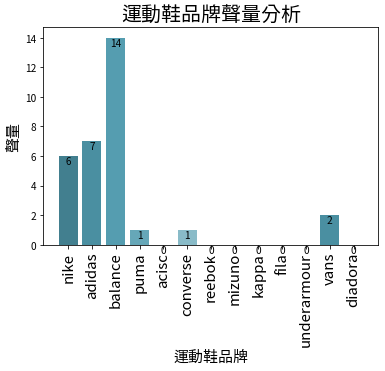

In [6]:
plt.bar(shoes_brand, brand_count, color=colrogroup1) 
plt.xticks(fontsize=15,rotation=90)

for index, data in enumerate(brand_count):
    plt.text(x=index, y =data, s=data, verticalalignment="top", horizontalalignment="center")
    
plt.xlabel('運動鞋品牌', fontsize=15)
plt.ylabel('聲量', fontsize=15)
plt.title('運動鞋品牌聲量分析', fontsize=20)
plt.show()